**************************************
# **2a. Prova Prática de SCC275- Ciência de Dados**
## SCC - ICMC - USP
## **Profa. Roseli Ap. Francelin Romero**

2o. semestre de 2023
**************************************
Vamos utilizar o conjunto de dados do UCI **Heart disease**.
Ele descreve algumas características de pacientes e como atributo alvo, a classe, se o paciente tem doença cardíaca ou não. No total o conjunto possui 13 atributos e 1 alvo:

**Atributo Definição Valor**

- age (Idade do paciente)
- sex (sexo do paciente)
- cp (Tipo de dor no peito)
- trestbps (Pressão sanguínea em repouso)
- chol (Colesterol em mg/dl)
- fbs (Taxa de açucar no sangue > 120 mg/dl)
- restecg (Resultado do ECG em repouso)
- thalach (Taxa de batimentos máxima)
- exang (Angina induzida por exercício)
- oldpeak = Depressão ST induzida por exercicio relativo a descanso.
- slope (o declive do pico ST)
- ca (número de veias colorizadas por fluoroscopia)
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
- target (possui problema cardíaco ou não)

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
import pandas as pd

In [42]:
caminho_arquivo = '/content/gdrive/MyDrive/clv_heart_disease.data'
df = pd.read_csv(caminho_arquivo, na_values = '?')
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


1. **EXPLORAÇÃO de DADOS**(EDA)
**a)** Analise os atributos sex, age, chol, thalac, restecg, utilizando o **bar plot** (matplotlib.pyplot.bar ou seaborn.barplot)  para cada atributo.

**b)** Formule pelo menos 3 hipóteses baseado no item a). Por exemplo, o atributo Age não influi no valor do colesterol.

**c)** Reanalise as medidas do item a) por **classe**, isto é, faça o Boxplot por classe e atributos ou de maneira que o ajude a responder suas perguntas. Scatterplot, correlação e pairplot (seaborn) podem ajudar.

**d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões.
Caso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?



###A

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

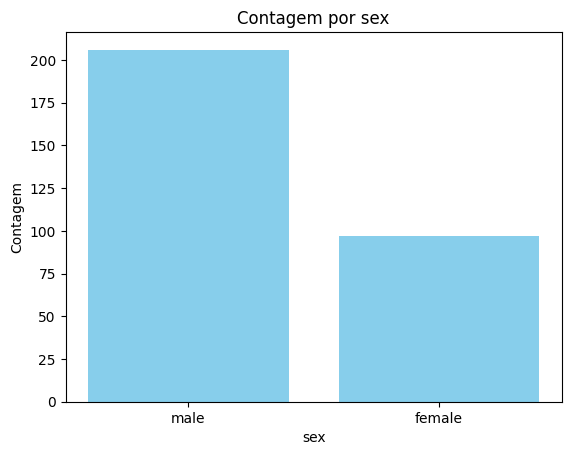

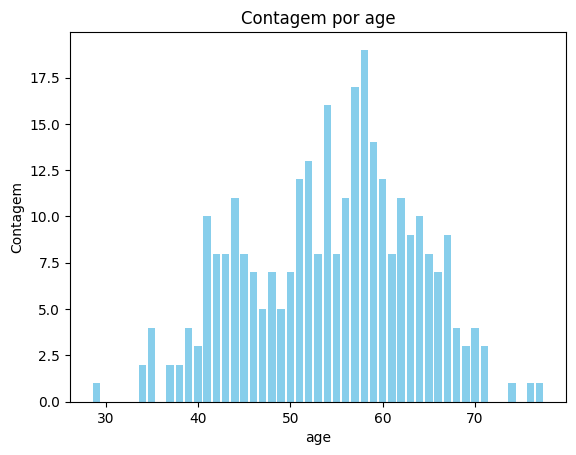

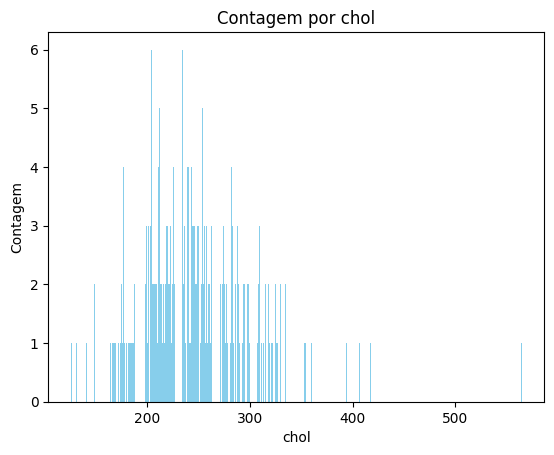

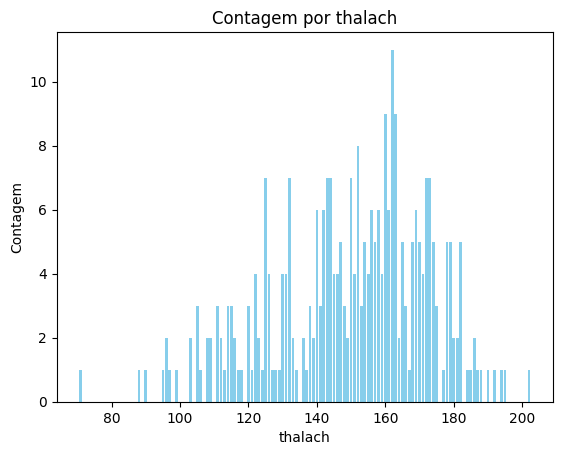

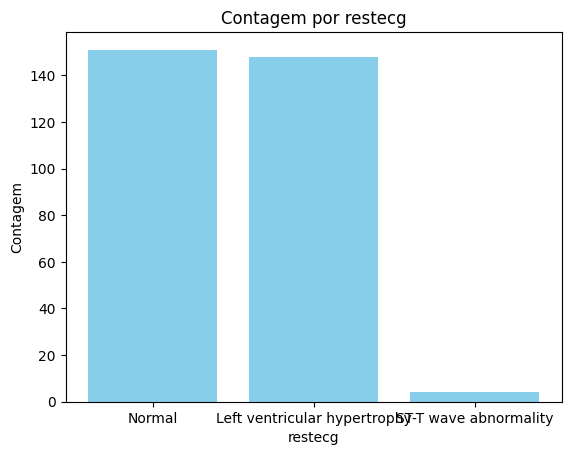

In [44]:
for i, coluna in enumerate(['sex', 'age', 'chol', 'thalach', 'restecg']):
  contagem_categorias = df[coluna].value_counts()

  rotulos = contagem_categorias.index
  alturas = contagem_categorias.values

  plt.bar(rotulos, alturas, color='skyblue')
  plt.title(f'Contagem por {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Contagem')
  plt.show()

Notamos que a quantidade de homens nos dados é pelo menos o dobro, também observamos que a distribuição da idade lembra uma distribuição normal. A do colesterol também lembra uma distribuição normal, mas observamos um outlier muito acima dos 500 fugindo do padrão. Já no Thalach percebemos que a distribuição tende a ter uma cauda maior à esquerda. E no Restecg notamos que quase não existem dados da ST-T wave abnormality.

###B<br>
3 Hipoteses<br>
1. Gênero não influi no colesterol
2. Ter mais ou menos de 40 anos não influi thalach
3. Pessoas com mais de 50 anos tem colesterol menor que pessoas entre 20 a 50 anos

###C

Verificarei as hipoteses.

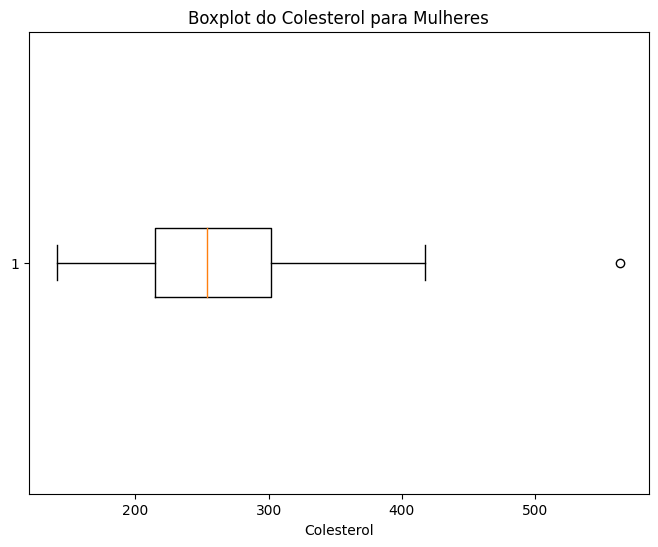

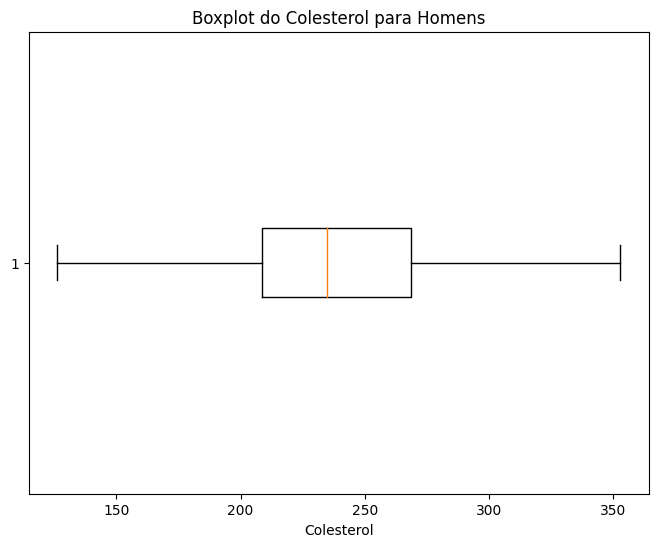

In [45]:
mulheres_df = df[df['sex'] == 'female']
homens_df = df[df['sex'] == 'male']

plt.figure(figsize=(8, 6))
plt.boxplot(mulheres_df['chol'], vert=False)
plt.title('Boxplot do Colesterol para Mulheres')
plt.xlabel('Colesterol')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(homens_df['chol'], vert=False)
plt.title('Boxplot do Colesterol para Homens')
plt.xlabel('Colesterol')
plt.show()

1. Observamos que o gênero influi no colesterol.

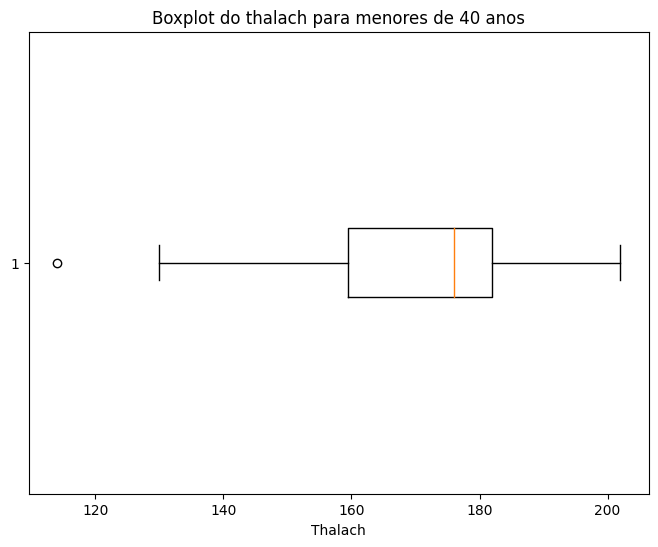

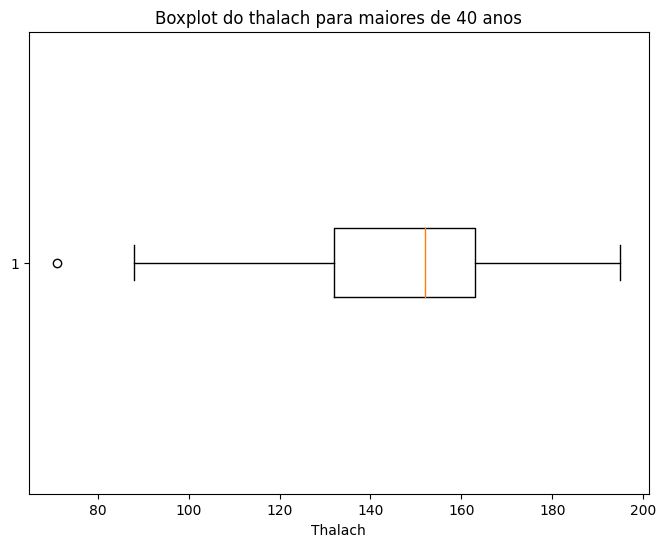

In [46]:
pessoas_mais40 = df.loc[df['age'] > 40]
pessoas_menos40 = df.loc[df['age'] <= 40]

plt.figure(figsize=(8, 6))
plt.boxplot(pessoas_menos40['thalach'], vert=False)
plt.title('Boxplot do thalach para menores de 40 anos')
plt.xlabel('Thalach')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(pessoas_mais40['thalach'], vert=False)
plt.title('Boxplot do thalach para maiores de 40 anos')
plt.xlabel('Thalach')
plt.show()


2. Notamos que a diferença de idade é irrelevante para o Thalach

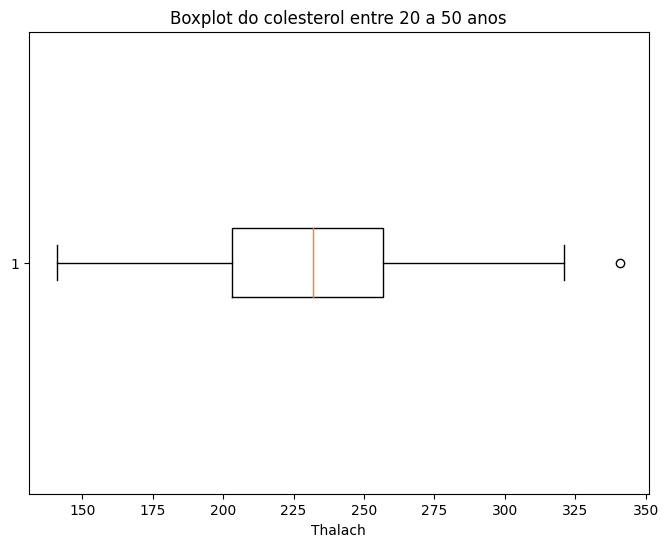

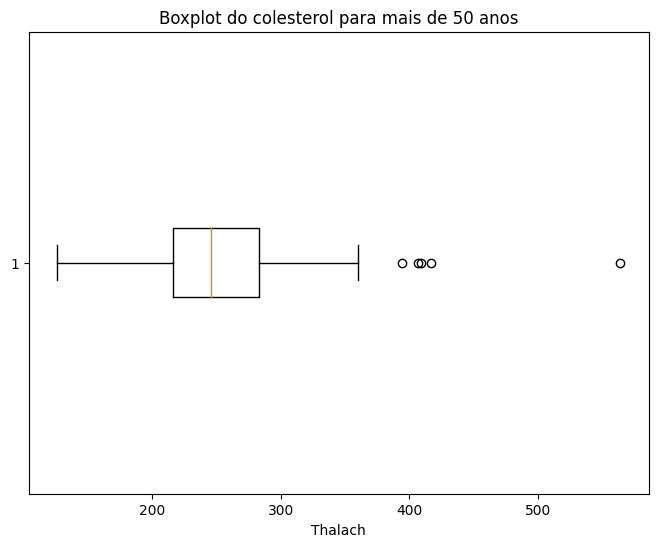

In [47]:
pessoas_20a50 = df.loc[(df['age'] >= 20) & (df['age'] <= 50)]
pessoas_mais50 = df.loc[df['age'] > 50]

plt.figure(figsize=(8, 6))
plt.boxplot(pessoas_20a50['chol'], vert=False)
plt.title('Boxplot do colesterol entre 20 a 50 anos')
plt.xlabel('Thalach')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(pessoas_mais50['chol'], vert=False)
plt.title('Boxplot do colesterol para mais de 50 anos')
plt.xlabel('Thalach')
plt.show()


3. Notamos que pessoas com mais de 50 anos tendem a ter uma variância menor do colesterol

###D

Vamos verificar a quantidade de dados:

In [48]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

Notamos que há tão poucos valores faltantes que é irrelevante.

In [49]:
df.shape

(303, 15)

Percebo aqui que temos apenas 303 tuplas, o que pode dar uma falsa impressão já que a quantidade de dados é pequena.

In [50]:
print(pessoas_20a50.shape)
print(pessoas_mais50.shape)

(94, 15)
(209, 15)


Aqui posso notar que por ter pelo menos o dobro de dados com pessoas com mais de 50 anos talvez isso ajude a concentrar eles e talvez a variação do colerol só seja menor por conta desse motivo.

In [51]:
print(pessoas_mais40.shape)
print(pessoas_menos40.shape)

(285, 15)
(18, 15)


Aqui é visível que a quantidade de pessoas com menos de 40 anos é extremamente baixa nos dados, tão baixa que não acredito ser seguro tentar verificar a hipótese 2 nesse caso. Seria melhor coletar mais dados com pessoas menores de 40 anos.

Vou verificar se existe alguma variação de idade entre homens e mulheres.

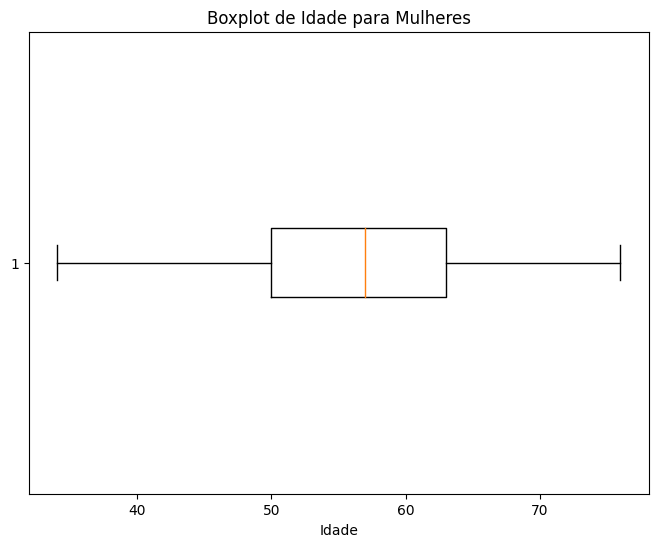

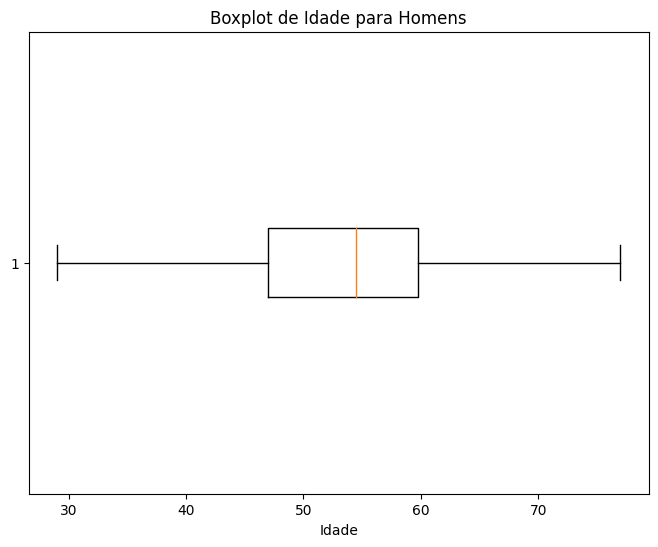

In [52]:
plt.figure(figsize=(8, 6))
plt.boxplot(mulheres_df['age'], vert=False)
plt.title('Boxplot de Idade para Mulheres')
plt.xlabel('Idade')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(homens_df['age'], vert=False)
plt.title('Boxplot de Idade para Homens')
plt.xlabel('Idade')
plt.show()

Percebo que é bem próxima a variação de idade entre os sexos, portanto acredito ser seguro afirmar que a diferença de gênero influi no colesterol, onde Homens tendem a ter mais que as mulheres.



**2. PRÉ-PROCESSAMENTO DOS DADOS**

**a)** Explique qual é a diferença entre **isnull** e **isna** e como voce pode preencher um valor nulo.

**b)** Substitua valores faltantes, padronize os dados, etc. Faça tratamento de atributos categóricos.

**c)** Remova os atributos que achar necessário e justifique.  

**d)** Faça também a seleção dos atributos que achar mais relevantes de acordo com o método de sua preferência. Explique porque os escolheu.


###A
As funções isnull() e isna() fazem a mesma coisa, a diferença ocorre porque são implementadas com base no R, pois lá null e na são diferentes. Onde null é nulo e na é not avaible. Mas como estamos implementando em python não existe essa diferença, para preencher esses valores not avaible costumamos usar ***pd.read_csv('csv', na_values = '?')*** pois o parametro do na_values = '?' já reconhece os na como nulos.

###B

Como já foi feito anteriormente na questão 1 não irei utilizar o na_values. Também sei pela questão 1 que temos dados faltantes, vamos tratá-los.

In [53]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

In [54]:
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


In [55]:
df.dtypes

Unnamed: 0      int64
age           float64
sex            object
cp             object
trestbps      float64
chol          float64
fbs           float64
restecg        object
thalach       float64
exang          object
oldpeak       float64
slope          object
ca            float64
thal           object
num             int64
dtype: object

Irei prencher os valores de ca pela estratégia da media já que é um atributo numérico contínuo

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy = 'median')
df['ca'] = imputer.fit_transform(df['ca'].values.reshape(-1, 1))


Para o thal irei utilizar a estratégia do mais frequente por ser um atributo categótico.

In [58]:
imputer = SimpleImputer(strategy='most_frequent')
df['thal'] = imputer.fit(df['thal'].values.reshape(-1, 1))


In [59]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

Agora que estamos sem valores faltantes vamos padronizar os dados, irei tornar os atributos categoricos em numeros discretos. Utilizaremos label encoder

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
Categoricos_em_Discretos = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

imputer = LabelEncoder()
for col in Categoricos_em_Discretos:
  df[col] = imputer.fit_transform(df[col])

In [62]:
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,1,3,145.0,233.0,133.051002,0,150.0,0,2.3,0,0.0,0,0
1,1,67.0,1,0,160.0,286.0,106.803350,0,108.0,1,1.5,1,3.0,0,1
2,2,67.0,1,0,120.0,229.0,105.341447,0,129.0,1,2.6,1,2.0,0,1
3,3,37.0,1,2,130.0,250.0,102.194825,1,187.0,0,3.5,0,0.0,0,0
4,4,41.0,0,1,130.0,204.0,110.926185,0,172.0,0,1.4,2,0.0,0,0


A seguir irei padronizar os dados numéricos com o StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
Padronizar_Numericos = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']
imputer = StandardScaler()
for col in Padronizar_Numericos:
  df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

In [65]:
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,0.948726,1,3,0.757525,-0.264900,2.135901,0,0.017197,0,1.087338,0,-0.711131,0,0
1,1,1.392002,1,0,1.611220,0.760415,-0.228144,0,-1.821905,1,0.397182,1,2.504881,0,1
2,2,1.392002,1,0,-0.665300,-0.342283,-0.359813,0,-0.902354,1,1.346147,1,1.432877,0,1
3,3,-1.932564,1,2,-0.096170,0.063974,-0.643220,1,1.637359,0,2.122573,0,-0.711131,0,0
4,4,-1.489288,0,1,-0.096170,-0.825922,0.143187,0,0.980537,0,0.310912,2,-0.711131,0,0


###C

Vamos ver quais as informações de maior valor, primeiro irei verificar a variância

In [66]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01
selector = VarianceThreshold(threshold)
df_selecionado = selector.fit_transform(df)
indices_selecionados = selector.get_support(indices=True)
df2 = df.iloc[:, indices_selecionados]
df2.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0,0.948726,1,3,0.757525,-0.264900,2.135901,0,0.017197,0,1.087338,0,-0.711131,0
1,1,1.392002,1,0,1.611220,0.760415,-0.228144,0,-1.821905,1,0.397182,1,2.504881,1
2,2,1.392002,1,0,-0.665300,-0.342283,-0.359813,0,-0.902354,1,1.346147,1,1.432877,1
3,3,-1.932564,1,2,-0.096170,0.063974,-0.643220,1,1.637359,0,2.122573,0,-0.711131,0
4,4,-1.489288,0,1,-0.096170,-0.825922,0.143187,0,0.980537,0,0.310912,2,-0.711131,0


In [67]:
from sklearn.feature_selection import VarianceThreshold

Numericas = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']
df2 = df[Numericas]
threshold = 0.3
selector = VarianceThreshold(threshold)
df2_transformed = selector.fit_transform(df2)
indices_selecionados = selector.get_support(indices=True)
df2_final = df2.iloc[:, indices_selecionados]
df2_final.head(5)

,age,trestbps,chol,fbs,thalach,oldpeak,ca
0,0.948726,0.757525,-0.264900,2.135901,0.017197,1.087338,-0.711131
1,1.392002,1.611220,0.760415,-0.228144,-1.821905,0.397182,2.504881
2,1.392002,-0.665300,-0.342283,-0.359813,-0.902354,1.346147,1.432877
3,-1.932564,-0.096170,0.063974,-0.643220,1.637359,2.122573,-0.711131
4,-1.489288,-0.096170,-0.825922,0.143187,0.980537,0.310912,-0.711131


Aqui eu noto que todas as características númericas tem grande variação portanto por enquanto irei manter. Por isso não alterei a df original.

###D
Irei fazer a matriz de correlação para eliminar as categorias que tiverem correlação muito alta

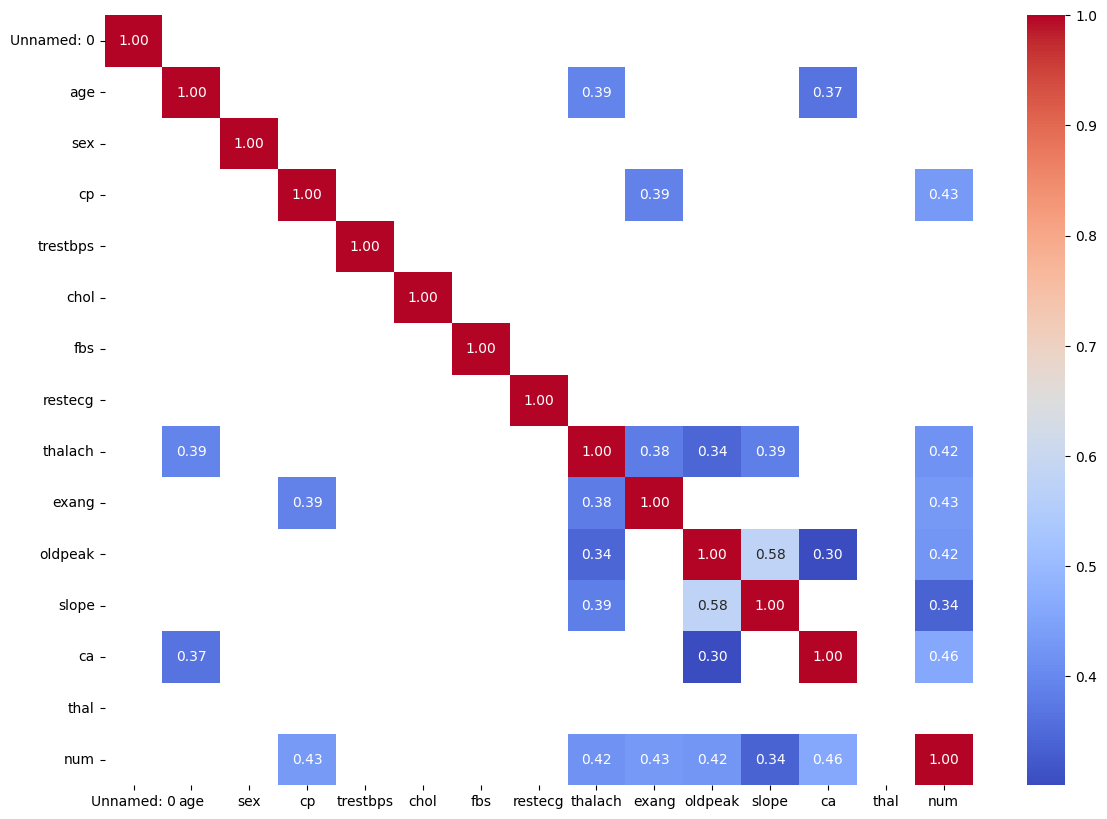

In [68]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=corr_matrix.abs() < threshold)
plt.show()

Como não existe nenhum atributo altamente correlacionado não irei remover nenhuma coluna.

#**3 - Modelagem dos Dados e Avaliação de Desempenho**
Pede-se:
**a)** Usar a função abaixo para classificação da sua base de dados e imprimir os valores de desempenho obtidos.

**b)** Baseado nos resultados do item anterior, calcule o valor de AUC para o melhor classificador?

**c)** Reduzir a dimensionalidade dos dados usando a tecnica PCA mantendo ao menos 90% da variância.

**d)** Verificar e imprimir o desempenho dos classificadores com a redução da dimensionalidade e calcular a porcentagem de variação obtida no desempenho.

###A

Primeiro irei dividir meu datafram no X e y para ter o target:

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop('num', axis=1)
y = df['num']

In [70]:
X.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0.948726,1,3,0.757525,-0.264900,2.135901,0,0.017197,0,1.087338,0,-0.711131,0
1,1,1.392002,1,0,1.611220,0.760415,-0.228144,0,-1.821905,1,0.397182,1,2.504881,0
2,2,1.392002,1,0,-0.665300,-0.342283,-0.359813,0,-0.902354,1,1.346147,1,1.432877,0
3,3,-1.932564,1,2,-0.096170,0.063974,-0.643220,1,1.637359,0,2.122573,0,-0.711131,0
4,4,-1.489288,0,1,-0.096170,-0.825922,0.143187,0,0.980537,0,0.310912,2,-0.711131,0


Vou alterar o cv=5 para cv=2 pois meu pc já passou mais de 10 minutos rodando isso durante a prova e não tenho esse tempo disponível

Vou reduzir a dimensão de X apenas para o algoritmo de AM ir mais rapido, nao faria isso se não precisasse de tempo

In [72]:
X = X.drop(['slope', 'exang', 'thalach', 'cp'], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}

for classificador_name in classificadores:
  modelo = classificadores[classificador_name]["modelo"]
  classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=2)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

Multi-Layer Perceptron (15,): 57.76 


###B

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

for classificador_name in classificadores:
    modelo = classificadores[classificador_name]["modelo"]
    y_pred = cross_val_predict(modelo, X, y, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %.2f)' % (classificador_name, roc_auc * 100))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

###C e D

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca.head(5)

In [ ]:
X_test_pca.head(5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}

for classificador_name in classificadores:
  modelo = classificadores[classificador_name]["modelo"]
  classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=2)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))